# Clase Texturas

## ¿Qué son?

Las texturas indican información sobre la distribución espacial del color (nivel de gris) en una imagen, que resumen las características geométricas locales.

## ¿Cómo se calculan?

En etapas:

1. Elección del vecindario de búsqueda (kernel)
2. Elección de direcciones y ángulos donde mirar en dicho kernel
3. Comienza el proceso iterativo:
    1. Por cada pixel de la imagen, calcular la matriz de co-ocurrencia.
    1. Por cada combinación de ángulo y dirección, se calcula una matriz de co-ocurrencia
        1. Esto genera `N` matrices de co-ocurrencia, donde `N` es igual al número de píxeles en la imagen (`x * y`), multiplicado por el número de direcciones y ángulos (`a * d`). `N = x * y * a * d`
        1. Por cada matriz de co-ocurrencia, calcular las texturas
    1. Para resumir el resultado de entrega, se suelen promediar todas las direcciones y ángulos por píxel, resultando una imagen de las mismas dimensiones que la original (`x * y`). Esto se debe realizar por cada una de las texturas deseadas.
    
Como se puede apreciar, es un procedimiento altamente intensivo (e iterativo!)

## ¿Qué es la matriz de co-ocurrencia?

En una matriz dada, cuenta el número de ocurrencias de pares de valores, en una dirección y ángulo dados. Es una especie de histograma de pares de valores, como en el siguiente ejemplo:

![](https://d3i71xaburhd42.cloudfront.net/2abc4f065cffc09d7136b7671cd4883e836ce402/3-Figure1-1.png)

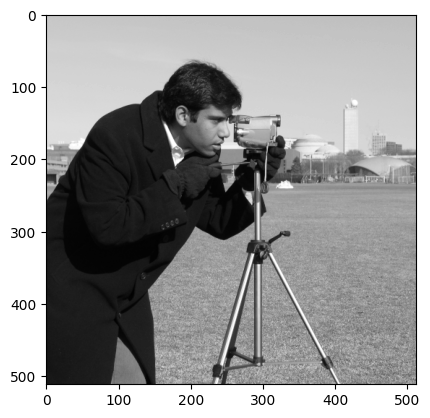

In [31]:
import matplotlib.pyplot as plt

from skimage.feature import graycomatrix, graycoprops
from skimage import data
import numpy as np

N_VECINOS = 2  # Tamaño del vecindario o kernel
angulos = [0, np.pi / 2]  # en radianes [0º, 90º]
distancias = [1, 2]  # en pixeles
niveles = 256

image = data.camera()  # imagen de prueba
plt.imshow(image, cmap=plt.cm.gray)

Extraemos un par de puntos para realizar el cálculo

(-0.5, 511.5, 511.5, -0.5)

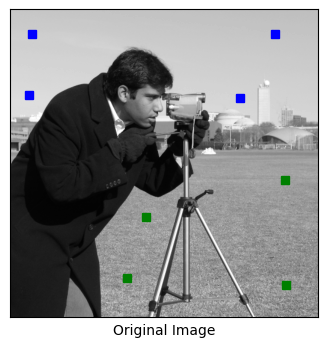

In [32]:
grass_locations = [(280, 454), (342, 223), (444, 192), (455, 455)]
grass_patches = []
for loc in grass_locations:
    grass_patches.append(image[(loc[0] - N_VECINOS - 1):(loc[0] + N_VECINOS),
                               (loc[1] - N_VECINOS - 1):(loc[1] + N_VECINOS)])

# select some patches from sky areas of the image
sky_locations = [(38, 34), (139, 28), (37, 437), (145, 379)]
sky_patches = []
for loc in sky_locations:
    sky_patches.append(image[(loc[0] - N_VECINOS - 1):(loc[0] + N_VECINOS),
                             (loc[1] - N_VECINOS- 1):(loc[1] + N_VECINOS)])
    
fig = plt.figure(figsize=(4, 4))

ax = fig.add_subplot(1, 1, 1)
ax.imshow(image, cmap=plt.cm.gray)
for (y, x) in grass_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
for (y, x) in sky_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
ax.set_xlabel('Original Image')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')

Y cómo se ve el vecindario de los puntos elegidos?

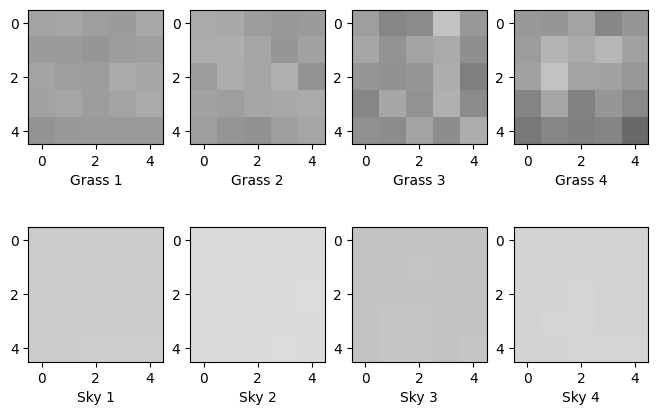

In [33]:
fig = plt.figure(figsize=(8, 8))

for i, patch in enumerate(grass_patches):
    ax = fig.add_subplot(3, len(grass_patches), len(grass_patches)*1 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel(f"Grass {i + 1}")

for i, patch in enumerate(sky_patches):
    ax = fig.add_subplot(3, len(sky_patches), len(sky_patches)*2 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel(f"Sky {i + 1}")

In [36]:
xs_ = []
ys_ = []
for patch in (grass_patches + sky_patches):
    glcm = graycomatrix(patch, distances=distancias, angles=angulos, levels=niveles,
                        symmetric=True, normed=True)
    xs_.append(graycoprops(glcm, 'dissimilarity'))
    ys_.append(graycoprops(glcm, 'correlation'))

In [41]:
xs = [np.mean(x) for x in xs_]
ys = [np.mean(x) for x in ys_]

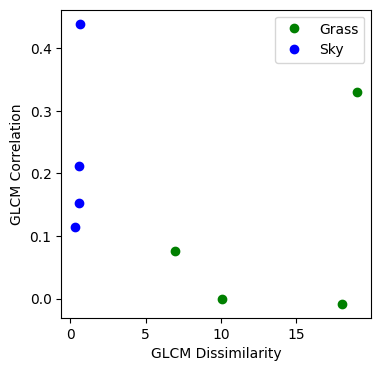

In [43]:
fig = plt.figure(figsize=(4, 4))

ax = fig.add_subplot(1, 1, 1)
ax.plot(xs[:len(grass_patches)], ys[:len(grass_patches)], 'go',
        label='Grass')
ax.plot(xs[len(grass_patches):], ys[len(grass_patches):], 'bo',
        label='Sky')
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend()